#### Módulo principal

Se comienza por cargar y verficar el dataset previamente organizado sin valores atípicos, nulos o clases mal
escritas.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("./Clean datasets/cleanData.csv")
print(df['CLASE'].unique())
print(df['GRAVEDAD'].unique(x))

['Choque' 'Otro' 'Caida Ocupante' 'Atropello' 'Volcamiento'
 'Caída Ocupante' 'Choquey Atropello' 'Incendio']
['HERIDO' 'SOLO DAÑOS' 'MUERTO']


En este punto de el desarrollo, nuestro dataset tiene las siguientes características para entrenar
['DIA_NOMBRE', 'CLASE', 'DIRECCION', 'TIPO_GEOCOD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA'],
la característica['GRAVEDAD'] que representa el tipo de accidente es la planeada para clasificar mientras que
la columna vala columna ['PERIODO'] se conserva sólo para posteriormente dividir los datos de entrenamiento en 2017-2018
 y para los de prueba 2019.

Como el modelo que se planeado a implementar es de machine learning, es necesario realizar una codificación
de clases porque este tipo de modelos sólo admite valores númericos como entrada


Para esto teníamos dos opciones:
- Label Encoder: A cada clase de cada columna categórica se le asigna un número entero distinto.
- One Hot Encoder: Por cada columna con n-clases crea n columnas nuevas en donde a la fila correspondiente
le asigna un valor binario "0" o "1" en la columna creada para la clase de el valor original

A pesar de que la teoría señale que One Hot Encoder tra major beneficio cuando las clases no tienen ninguna
relación jerarquica como en el caso de nosotros, se descartó esta opción porque existen categorías con más de
70 clases que terminan por generar una matriz dispersa poco óptima e inmanejable.

En el siguiente fragmento se codifican todas las clases

In [22]:
le = LabelEncoder()
features = ['DIA_NOMBRE', 'CLASE', 'DIRECCION', 'TIPO_GEOCOD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA']
x=df.loc[:,features].apply(le.fit_transform)
x

,DIA_NOMBRE,CLASE,DIRECCION,TIPO_GEOCOD,BARRIO,COMUNA,DISENO,MES,DIA
0,0,3,3025,4,226,37,3,6,1
1,4,3,18519,4,192,23,2,4,9
2,0,3,5310,4,41,47,9,4,6
3,4,3,14634,4,98,32,9,5,27
4,1,6,19725,4,108,37,9,5,7
...,...,...,...,...,...,...,...,...,...
113654,3,1,7398,4,58,38,9,7,5
113655,6,3,14842,4,220,65,9,6,4
113656,6,6,14186,4,117,65,9,7,22
113657,6,3,3082,4,138,47,9,6,18


Comunmente el siguiente paso sería eliminar los datos "Outliers" mediante una distribución como la gaussiana
donde se elimen los datos que se encuentren en las colas, como la base de datos utilizada sólo tiene
valores categóricos no se puede aplicar esta técnica porque se perderían las primeras y las últimas clases.

La

In [23]:
x=StandardScaler().fit_transform(x)
y=df.loc[:,['GRAVEDAD']]


# dfe=df.apply(le.fit_transform)
# print(dfe.head())



In [7]:
from sklearn.decomposition import PCA
pca = PCA (3, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False)
principalComponents = pca.fit_transform(x)
print(principalComponents)
print(principalComponents.shape)

[[ 0.22072352  1.28188788 -1.2996082 ]
 [-1.37801117 -0.06485218  0.17895916]
 [ 1.11348173 -0.02167422 -1.18519125]
 ...
 [ 0.0764134   0.80827923 -0.13815927]
 [ 1.50890854  0.44151252 -0.25932995]
 [ 1.30863301  0.55375124  0.38778389]]
(113659, 3)


[0.12950323 0.24716875 0.36129954 0.47311025 0.58443023 0.69480839
 0.80381952 0.90943989 1.        ]


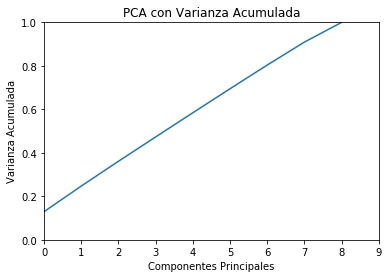

In [24]:
#Varianza acumulada
fil, col = x.shape
from matplotlib import pyplot
import numpy as np
ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(x)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [53]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Componente 1', 'Componente 2'])
finalDf = pd.concat([principalDf, df[['GRAVEDAD']]], axis = 1)

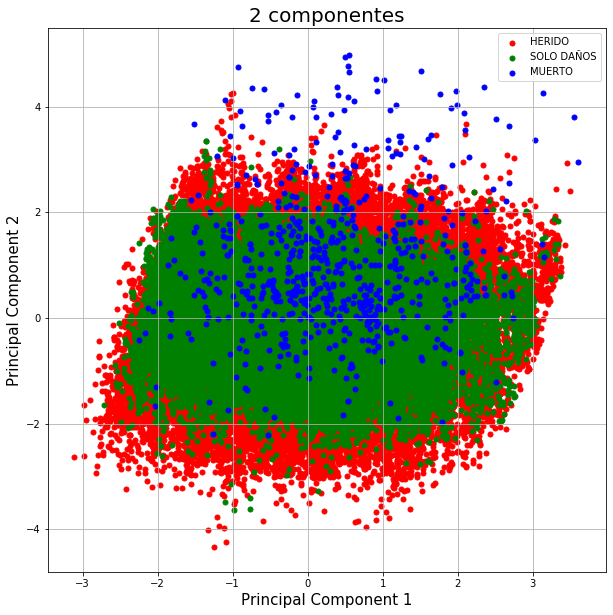

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes', fontsize = 20)
targets = finalDf['GRAVEDAD'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['GRAVEDAD'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente 1']
               , finalDf.loc[indicesToKeep, 'Componente 2']
               , c = color
               , s = 25)
ax.legend(targets)
ax.grid()

In [33]:
finalDf['CLASE'].unique()

# from pandas.api.types import is_numeric_dtype
# def remove_outlier(df):
#     low = .05
#     high = .95
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             print(quant_df.loc[low, name],name,quant_df.loc[high, name])
#             df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
#     return df
#
#
#
# df_sinOutLiers = remove_outlier(dfe)
# datosNuevos = df_sinOutLiers.values
# df_sinOutLiers

array(['Choque', 'Otro', 'Caida Ocupante', 'Atropello', 'Volcamiento',
       'Caída Ocupante', 'Choquey Atropello', 'Incendio'], dtype=object)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
